# Import Libraries

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

# Loading Directories

In [11]:
directory = r"..\Data Collection\Power_var\Cleaned_data\\"

# List all files in the current directory
files = os.listdir(directory)

# Filter out the CSV files
csv_files = [file for file in files if file.endswith('.csv')]

# Read each CSV file into a DataFrame and store them in a dictionary
dataframes = {file: pd.read_csv(directory+file) for file in csv_files}

In [12]:
for file, df in dataframes.items():
    df['Runtime'] = df['Runtime'] - df['Runtime'].iloc[0]

# Time Series Relationship between Input Voltage & System Temperature Over time

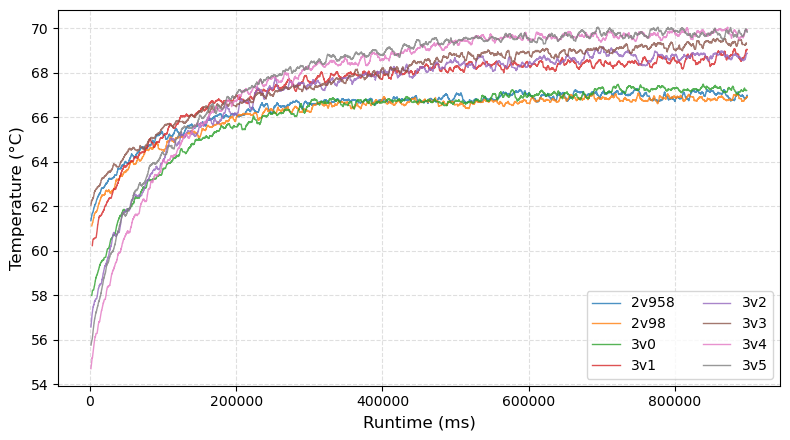

In [13]:
plt.figure(figsize=(8, 4.5))

window_size = 100  # Adjust smoothing intensity

for file, df in dataframes.items():
    # Filter data where Runtime <= 0.8e6 and Runtime >= 0
    df_filtered = df[(df['Runtime'] <= 900000) & (df['Runtime'] >= 0)]
    
    # Apply rolling average smoothing
    temperature_smooth = df_filtered['Temperature (C)'].rolling(window=window_size, center=True).mean()
    
    plt.plot(df_filtered['Runtime'], temperature_smooth, 
             label=file.split('.')[0].split('_')[2], linewidth=1, alpha=0.8)

plt.xlabel('Runtime (ms)', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.legend(loc='lower right', ncol=len(df.columns)/4 )
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()

# Save in high-quality formats
plt.savefig('dV_temperature_runtime_plot.png', dpi=300, bbox_inches='tight')
plt.savefig('dV_temperature_runtime_plot.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.show()

# Framerate Stability for Imput Voltage

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


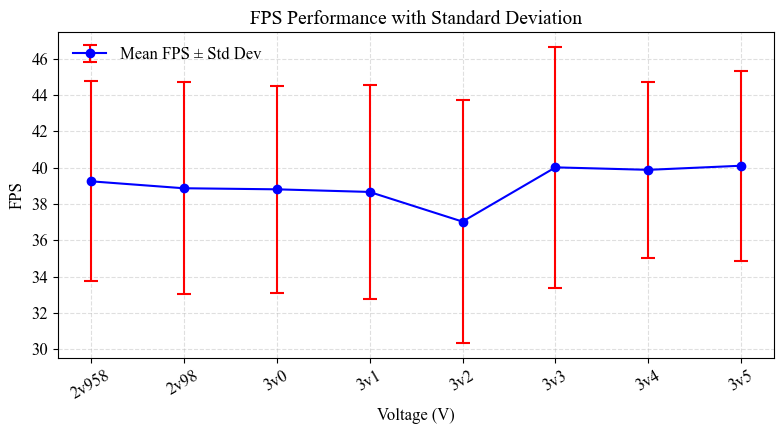

In [26]:
# IEEE Standard Figure Size
plt.figure(figsize=(8, 4.5))
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 12

# Create error bar plot
plt.errorbar(summary_df.index, summary_df["Mean FPS"], 
            yerr=summary_df["FPS Std Dev"],
            fmt='o-', capsize=5, capthick=1.5, 
            markersize=6, color='blue', 
            ecolor='red', linewidth=1.5,
            label='Mean FPS ± Std Dev')

plt.xlabel("Voltage (V)", fontsize=12, fontname="Times New Roman")
plt.ylabel("FPS", fontsize=12, fontname="Times New Roman")
plt.title("FPS Performance with Standard Deviation", 
          fontsize=14, fontname="Times New Roman")
plt.grid(True, linestyle='--', alpha=0.4)
plt.xticks(rotation=30)

# Add legend
plt.legend(frameon=False)

# Adjust layout
plt.tight_layout()

# Save in publication formats
plt.savefig("fps_errorbar_plot.eps", format="eps", dpi=300, bbox_inches="tight")
plt.savefig("fps_errorbar_plot.pdf", format="pdf", dpi=300, bbox_inches="tight")
plt.savefig("fps_errorbar_plot.png", dpi=300, bbox_inches="tight")

plt.show()

In [27]:
summary_df

,FPS Std Dev,Mean FPS
2v958,5.510728,39.251115
2v98,5.832140,38.867469
3v0,5.700729,38.808478
3v1,5.884676,38.664478
3v2,6.690817,37.029994
3v3,6.623254,40.018355
3v4,4.844152,39.881962
3v5,5.222750,40.108985


# Data Transmission Rate For Each Power Level

C:\Users\Sayed Nowroz\AppData\Local\Temp\ipykernel_129560\3275723720.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Rate'] = df_filtered['Bytes Transmitted'] / 1024  # KB/s
C:\Users\Sayed Nowroz\AppData\Local\Temp\ipykernel_129560\3275723720.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Rate'] = df_filtered['Bytes Transmitted'] / 1024  # KB/s
C:\Users\Sayed Nowroz\AppData\Local\Temp\ipykernel_129560\3275723720.py:20: SettingWithCopyWarning: 
A value is trying to be set

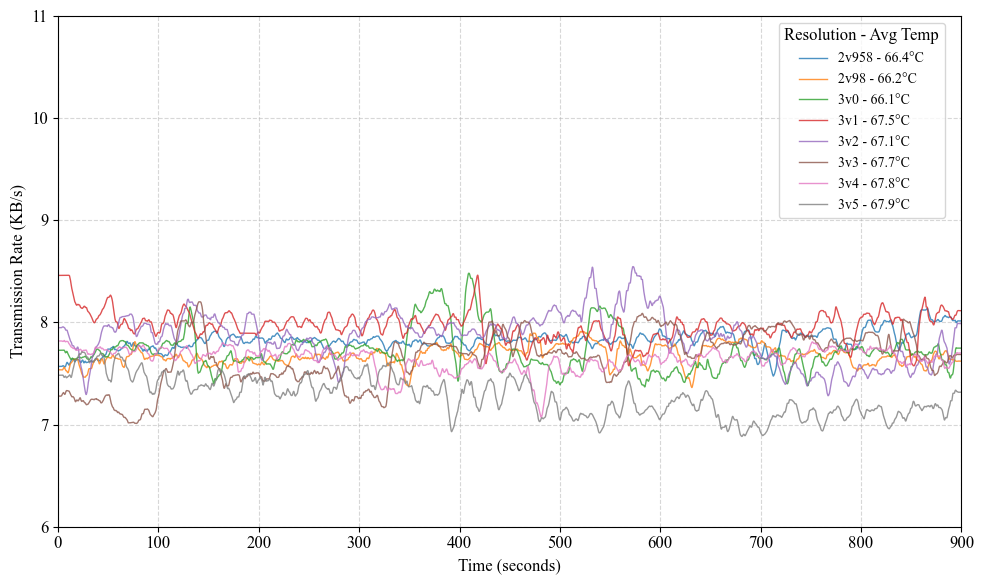

In [23]:
# IEEE Standard Figure Size
from scipy.signal import savgol_filter


plt.figure(figsize=(10, 6))
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 12

# Calculate metrics for each resolution
for file, df in dataframes.items():
    resolution = file.split('.')[0].split('_')[2]
    
    # Convert runtime to seconds
    df['Seconds'] = df['Runtime'] / 1000
    
    # Filter for first 15 minutes (900 seconds)
    df_filtered = df[df['Seconds'] <= 900]
    
    # Calculate transmission rate per second
    df_filtered['Rate'] = df_filtered['Bytes Transmitted'] / 1024  # KB/s
    
    # Apply two-stage smoothing
    window_size = 300
    rate_ma = df_filtered['Rate'].rolling(window=window_size, center=True).mean()
    
    rate_smooth = savgol_filter(rate_ma.fillna(method='bfill').fillna(method='ffill'), 
                               window_length=100, polyorder=3)
    
    plt.plot(df_filtered['Seconds'], rate_smooth,
             label=f"{resolution} - {df_filtered['Temperature (C)'].mean():.1f}°C",
             linewidth=1, alpha=0.8)

plt.xlabel('Time (seconds)', fontsize=12)
plt.ylabel('Transmission Rate (KB/s)', fontsize=12)
plt.legend(title='Resolution - Avg Temp', bbox_to_anchor=(0.79, 1), loc='upper left', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xlim(0, 900)
plt.ylim(6, 11)  # Set y-axis limits from 0 to 120 KB/s
plt.tight_layout()

# Save in publication formats
plt.savefig("transmission_volt_rate_smooth.pdf", format="pdf", dpi=300, bbox_inches="tight")
plt.savefig("transmission_volt_rate_smooth.png", dpi=300, bbox_inches="tight")
plt.show()

# Data Transfer Volumer per Power level

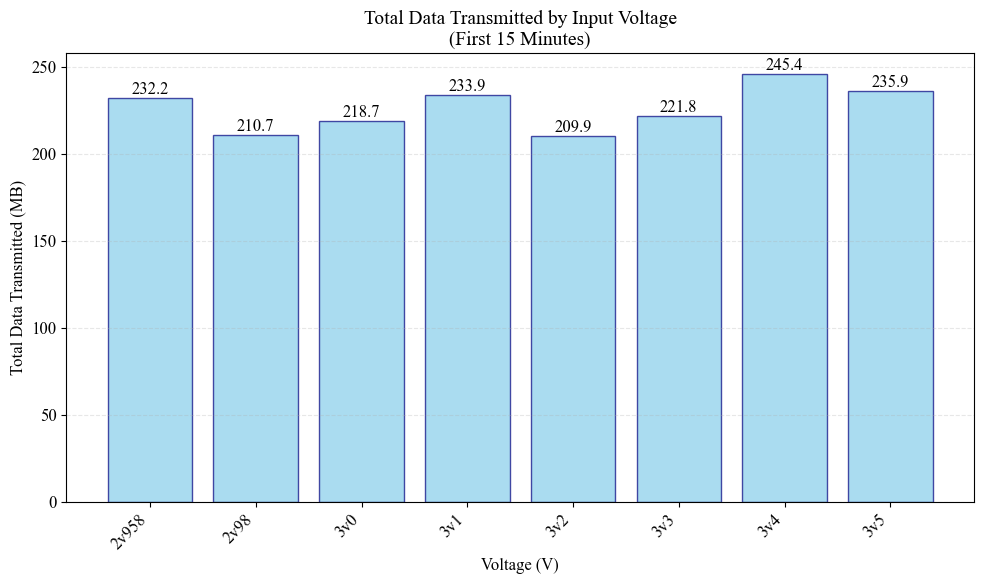


Total Data Transmitted (First 15 Minutes):
--------------------------------------------------
Voltage 2v958: 232.17 MB
Voltage 2v98: 210.74 MB
Voltage 3v0: 218.75 MB
Voltage 3v1: 233.86 MB
Voltage 3v2: 209.86 MB
Voltage 3v3: 221.79 MB
Voltage 3v4: 245.42 MB
Voltage 3v5: 235.93 MB

Transmission Statistics (First 15 Minutes):
----------------------------------------------------------------------
Voltage    Total (MB)   Std Dev (KB/s)  Mean Rate (KB/s)
----------------------------------------------------------------------
2v958           232.17           0.49           7.82
2v98            210.74           0.53           7.67
3v0             218.75           0.56           7.72
3v1             233.86           0.63           7.96
3v2             209.86           0.71           7.84
3v3             221.79           0.58           7.65
3v4             245.42           0.45           7.64
3v5             235.93           0.54           7.28


In [24]:

plt.figure(figsize=(10, 6))
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 12

# Calculate total bytes transmitted for each voltage
total_bytes = {}
for file, df in dataframes.items():
    voltage = file.split('.')[0].split('_')[2]  # Extract voltage from filename
    # Filter for first 15 minutes (900 seconds)
    df_filtered = df[df['Runtime'] / 1000 <= 900]
    total_bytes[voltage] = df_filtered['Bytes Transmitted'].sum() / (1024 * 1024)  # Convert to MB

# Create bar plot with sorted voltages
# Modified sorting to handle voltage strings like '2v95'
voltages = sorted(total_bytes.keys(), 
                 key=lambda x: float(x.replace('v', '.')))  # Replace 'v' with '.' for proper float conversion
values = [total_bytes[v] for v in voltages]

plt.bar(voltages, values, color='skyblue', edgecolor='navy', alpha=0.7)
plt.xticks(rotation=45, ha='right')

plt.xlabel('Voltage (V)', fontsize=12)
plt.ylabel('Total Data Transmitted (MB)', fontsize=12)
plt.title('Total Data Transmitted by Input Voltage\n(First 15 Minutes)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.3, axis='y')

# Add value labels on top of bars
for i, v in enumerate(values):
    plt.text(i, v, f'{v:.1f}', ha='center', va='bottom')

plt.tight_layout()

# Save in publication formats
plt.savefig("total_data_by_voltage.pdf", format="pdf", dpi=300, bbox_inches="tight")
plt.savefig("total_data_by_voltage.png", dpi=300, bbox_inches="tight")
plt.show()

# Print the values
print("\nTotal Data Transmitted (First 15 Minutes):")
print("-" * 50)
for voltage, total in zip(voltages, values):
    print(f"Voltage {voltage}: {total:.2f} MB")
    
    
# Calculate and print both total bytes and standard deviation for each voltage
print("\nTransmission Statistics (First 15 Minutes):")
print("-" * 70)
print(f"{'Voltage':<10} {'Total (MB)':<12} {'Std Dev (KB/s)':<15} {'Mean Rate (KB/s)':<15}")
print("-" * 70)

for voltage in voltages:
    for file, df in dataframes.items():
        if voltage in file:
            # Filter for first 15 minutes
            df_filtered = df[df['Runtime'] / 1000 <= 900]
            
            # Calculate statistics
            total_mb = df_filtered['Bytes Transmitted'].sum() / (1024 * 1024)  # Total MB
            rate_kbps = df_filtered['Bytes Transmitted'] / 1024  # KB per sample
            std_dev = rate_kbps.std()
            mean_rate = rate_kbps.mean()
            
            print(f"{voltage:<10} {total_mb:>11.2f} {std_dev:>14.2f} {mean_rate:>14.2f}")


In [25]:
# Calculate and print number of transmissions for each resolution
print("\nNumber of Transmissions by Resolution (First 15 Minutes):")
print("-" * 60)
print(f"{'Resolution':<15} {'Total Transmissions':<20} {'Transmissions/min':<20}")
print("-" * 60)

for file, df in dataframes.items():
    resolution = file.split('.')[0].split('_')[2]
    # Filter for first 15 minutes
    df_filtered = df[df['Runtime'] / 1000 <= 900]
    total_transmissions = len(df_filtered)
    transmissions_per_min = total_transmissions / 15  # 15 minutes period
    
    print(f"{resolution:<15} {total_transmissions:<20d} {transmissions_per_min:>18.2f}")


Number of Transmissions by Resolution (First 15 Minutes):
------------------------------------------------------------
Resolution      Total Transmissions  Transmissions/min   
------------------------------------------------------------
2v958           30396                           2026.40
2v98            28122                           1874.80
3v0             29018                           1934.53
3v1             30083                           2005.53
3v2             27398                           1826.53
3v3             29679                           1978.60
3v4             32884                           2192.27
3v5             33198                           2213.20
